In [252]:
import MagicPoint.dataset.photometries as photometries
import cv2

from MagicPoint.dataset.artificial_dataset import ArtificialDataset, available_modes
from MagicPoint.dataset.dataset_pipeline import parse_primitives, photometric_augmentation, homographic_augmentation

from common.utils import *

%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [239]:
config = load_config('../configs/config_toy.yaml')
data_config = config['data']
experiment_config = config['experiment']

data_config['augmentation']['photometric']['enable'] = False
data_config['augmentation']['homographic']['enable'] = False

In [240]:
set_seed(experiment_config['seed'])

train_dataset = ArtificialDataset(available_modes[0], data_config)


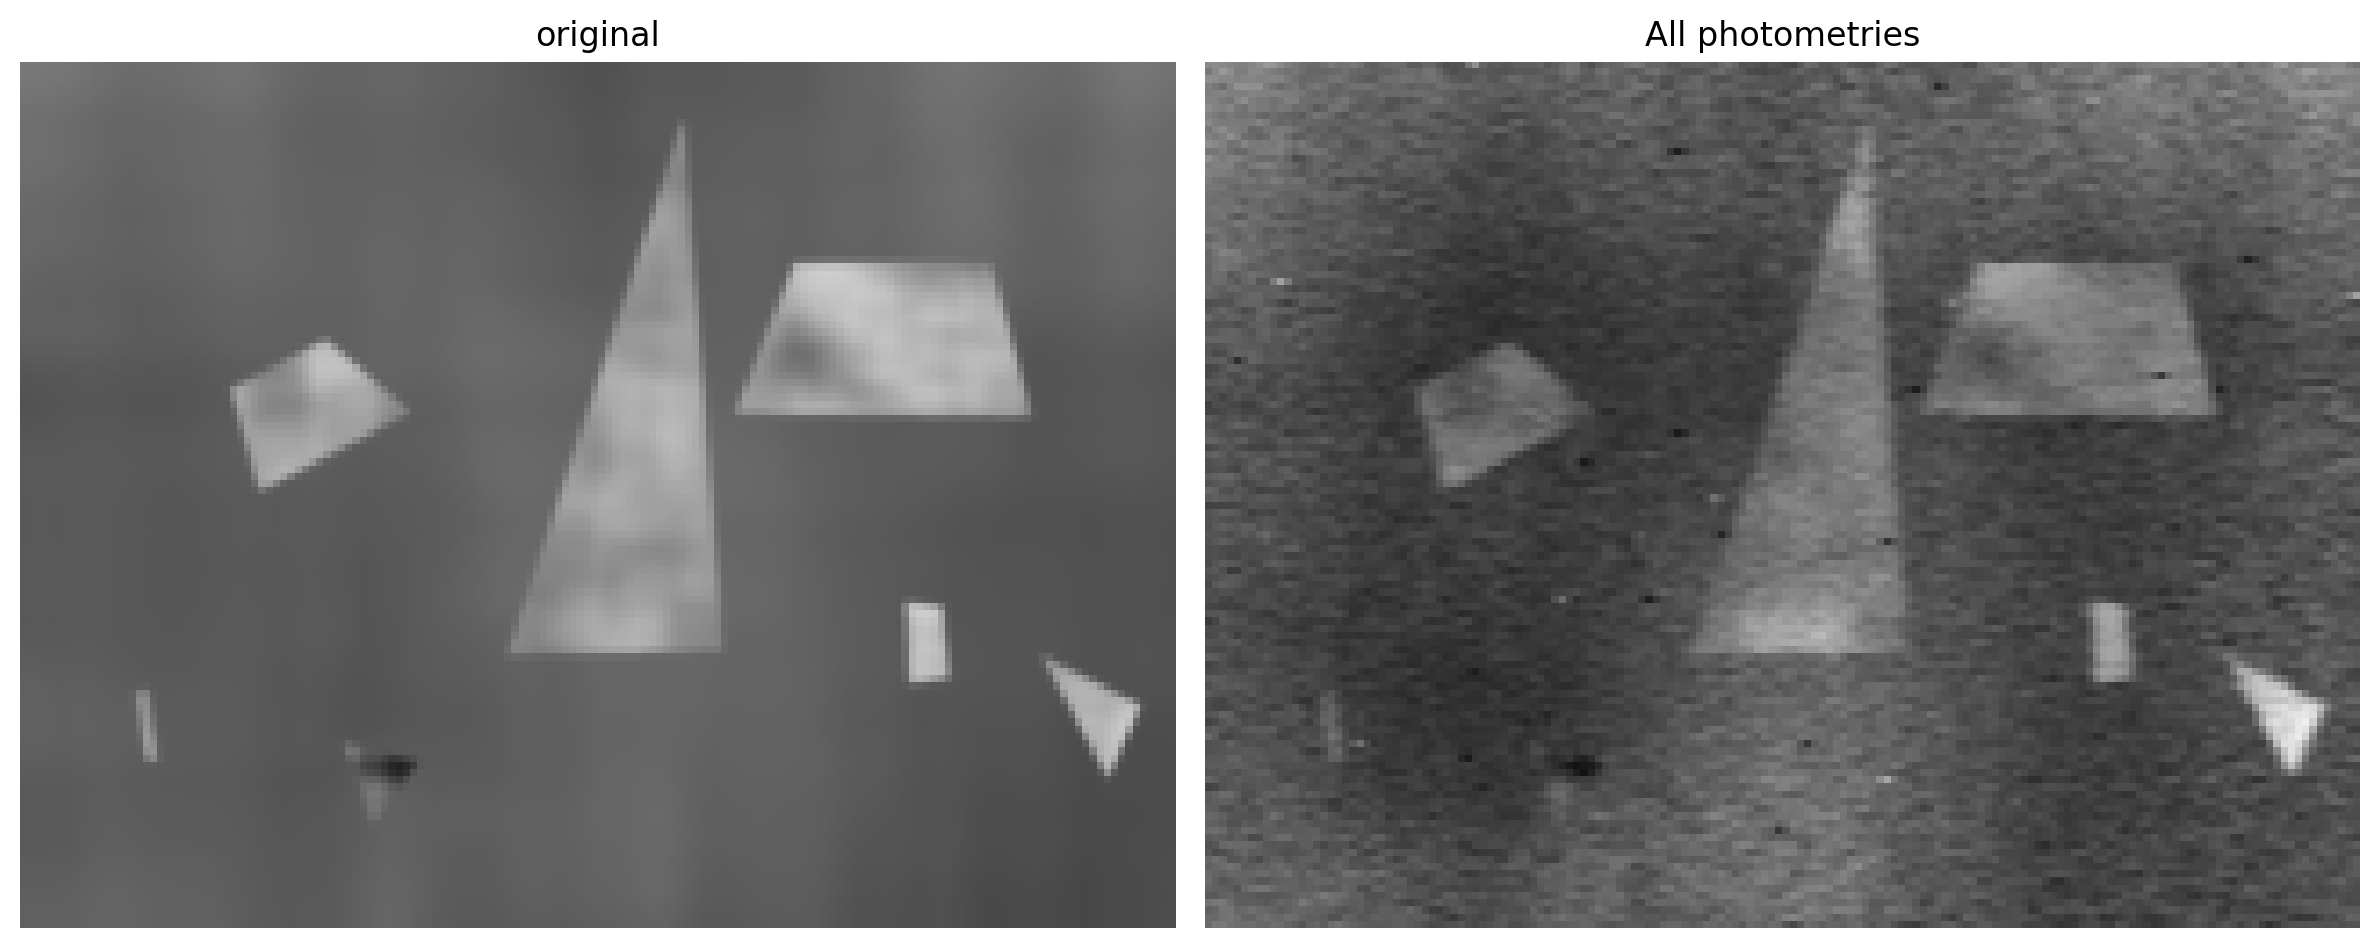

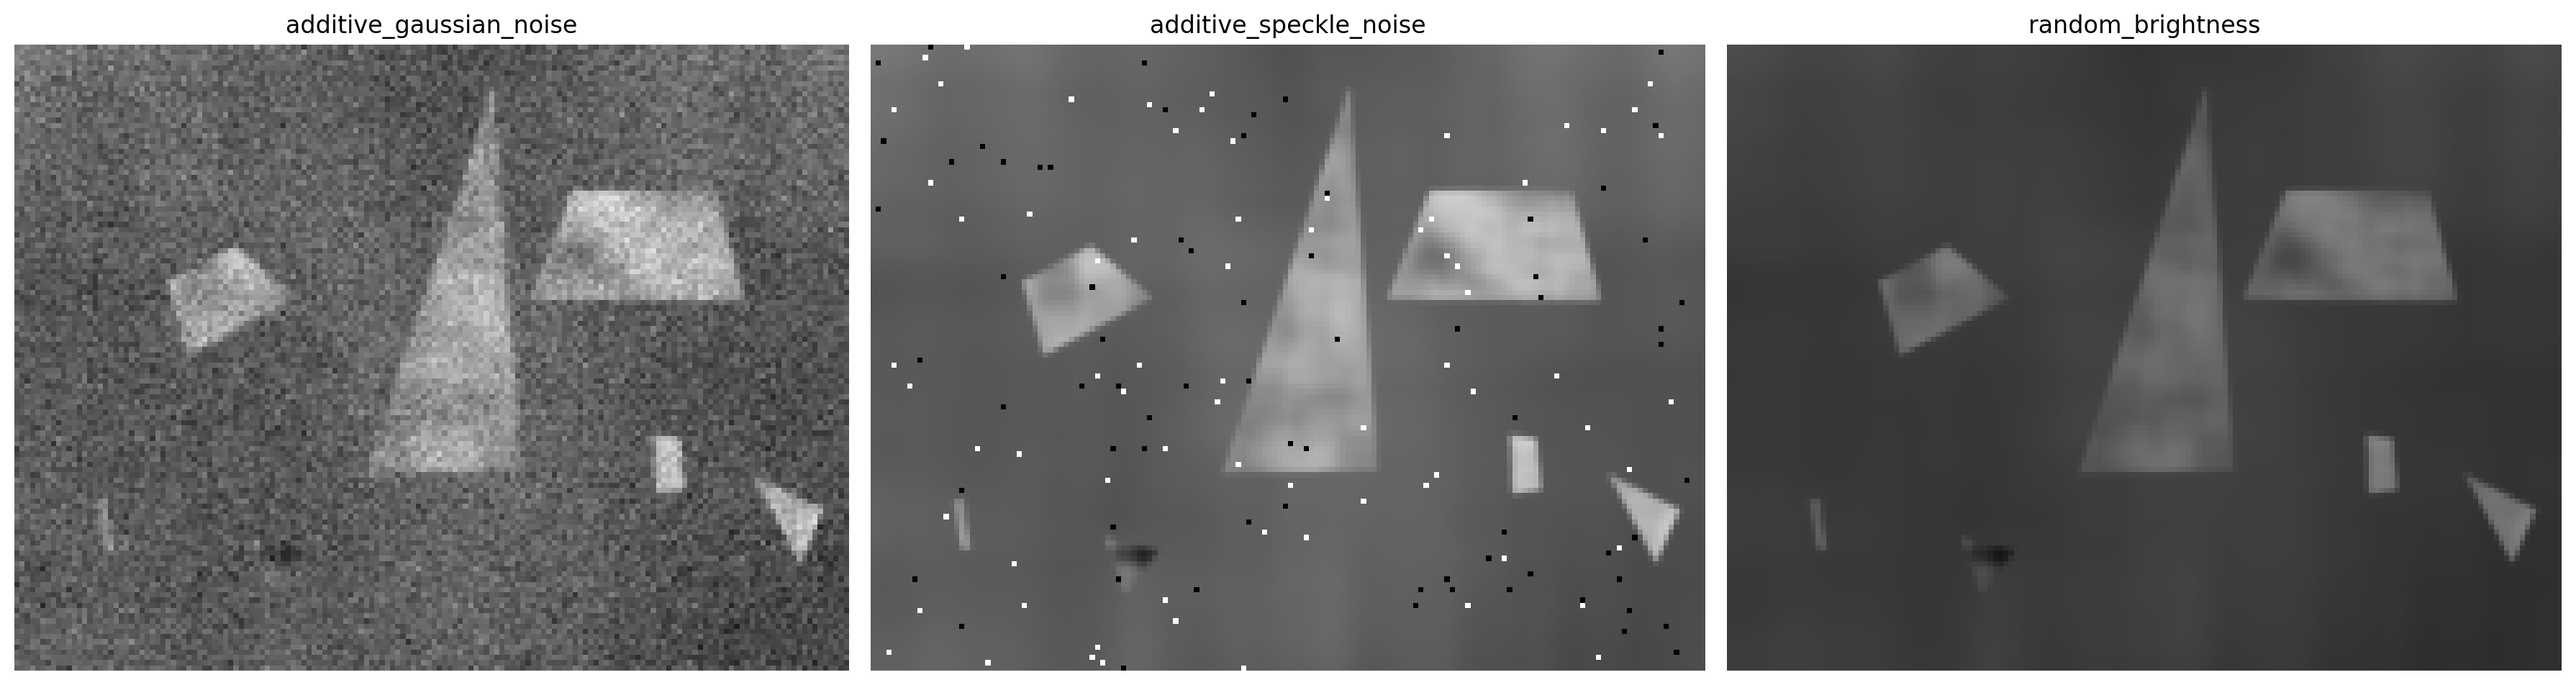

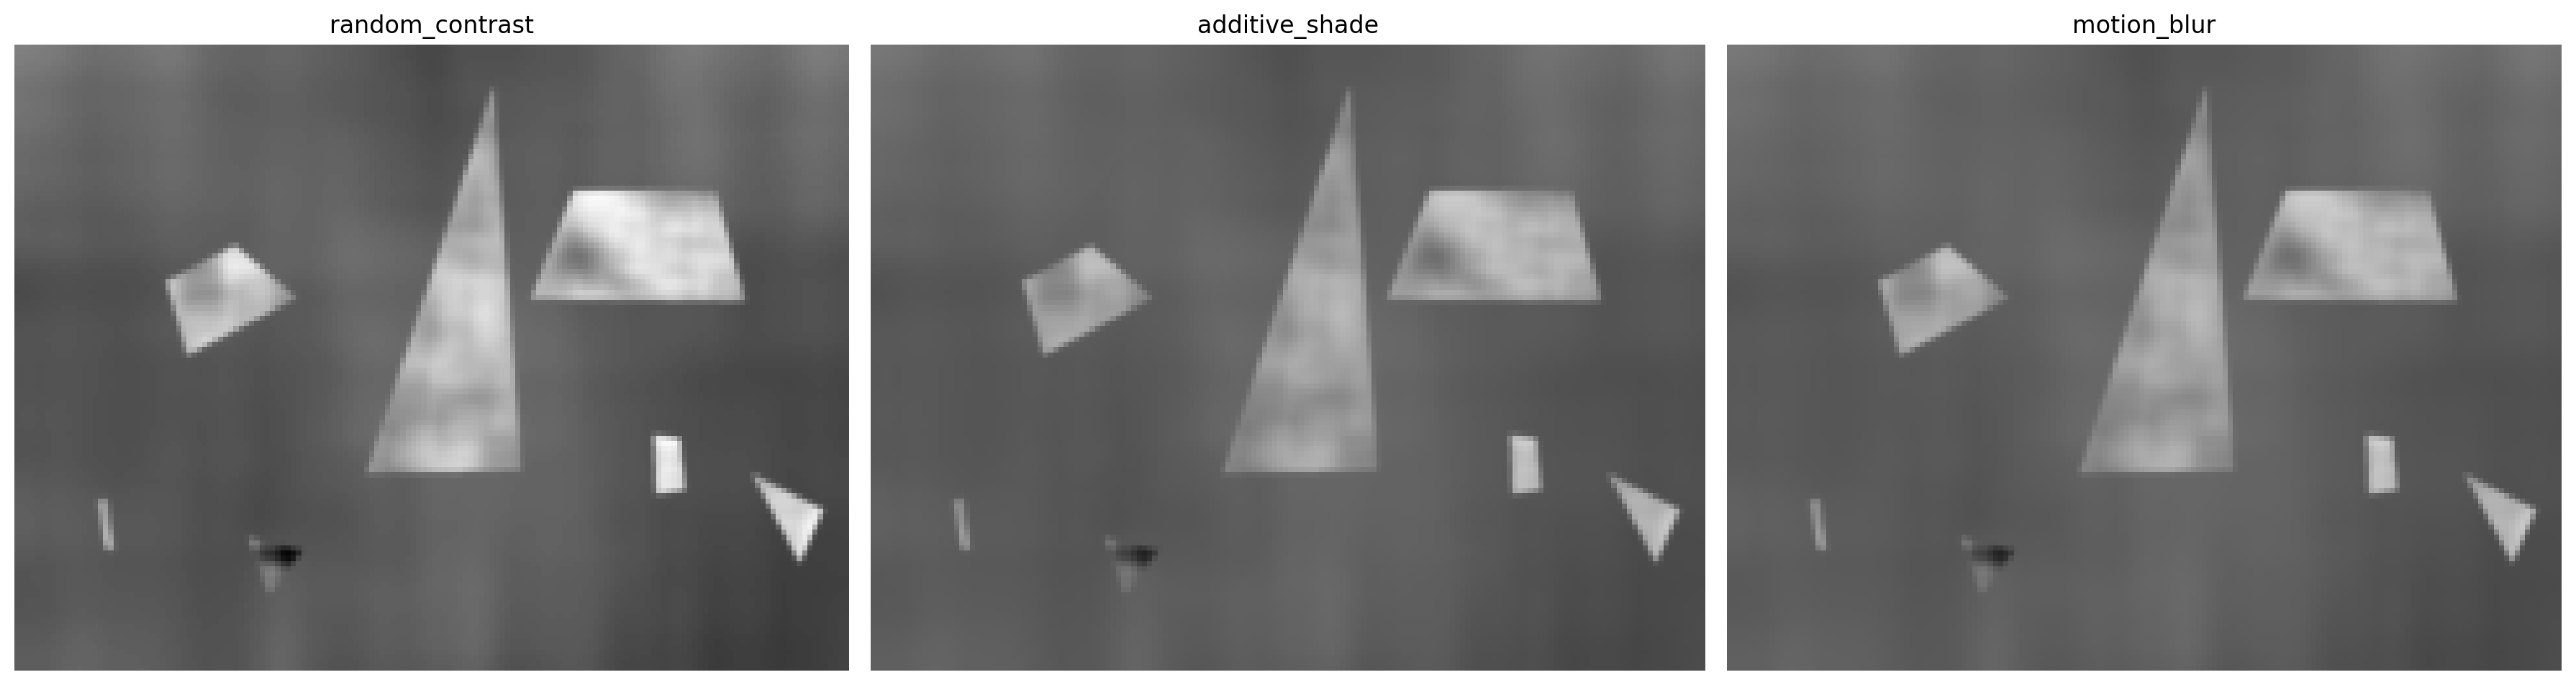

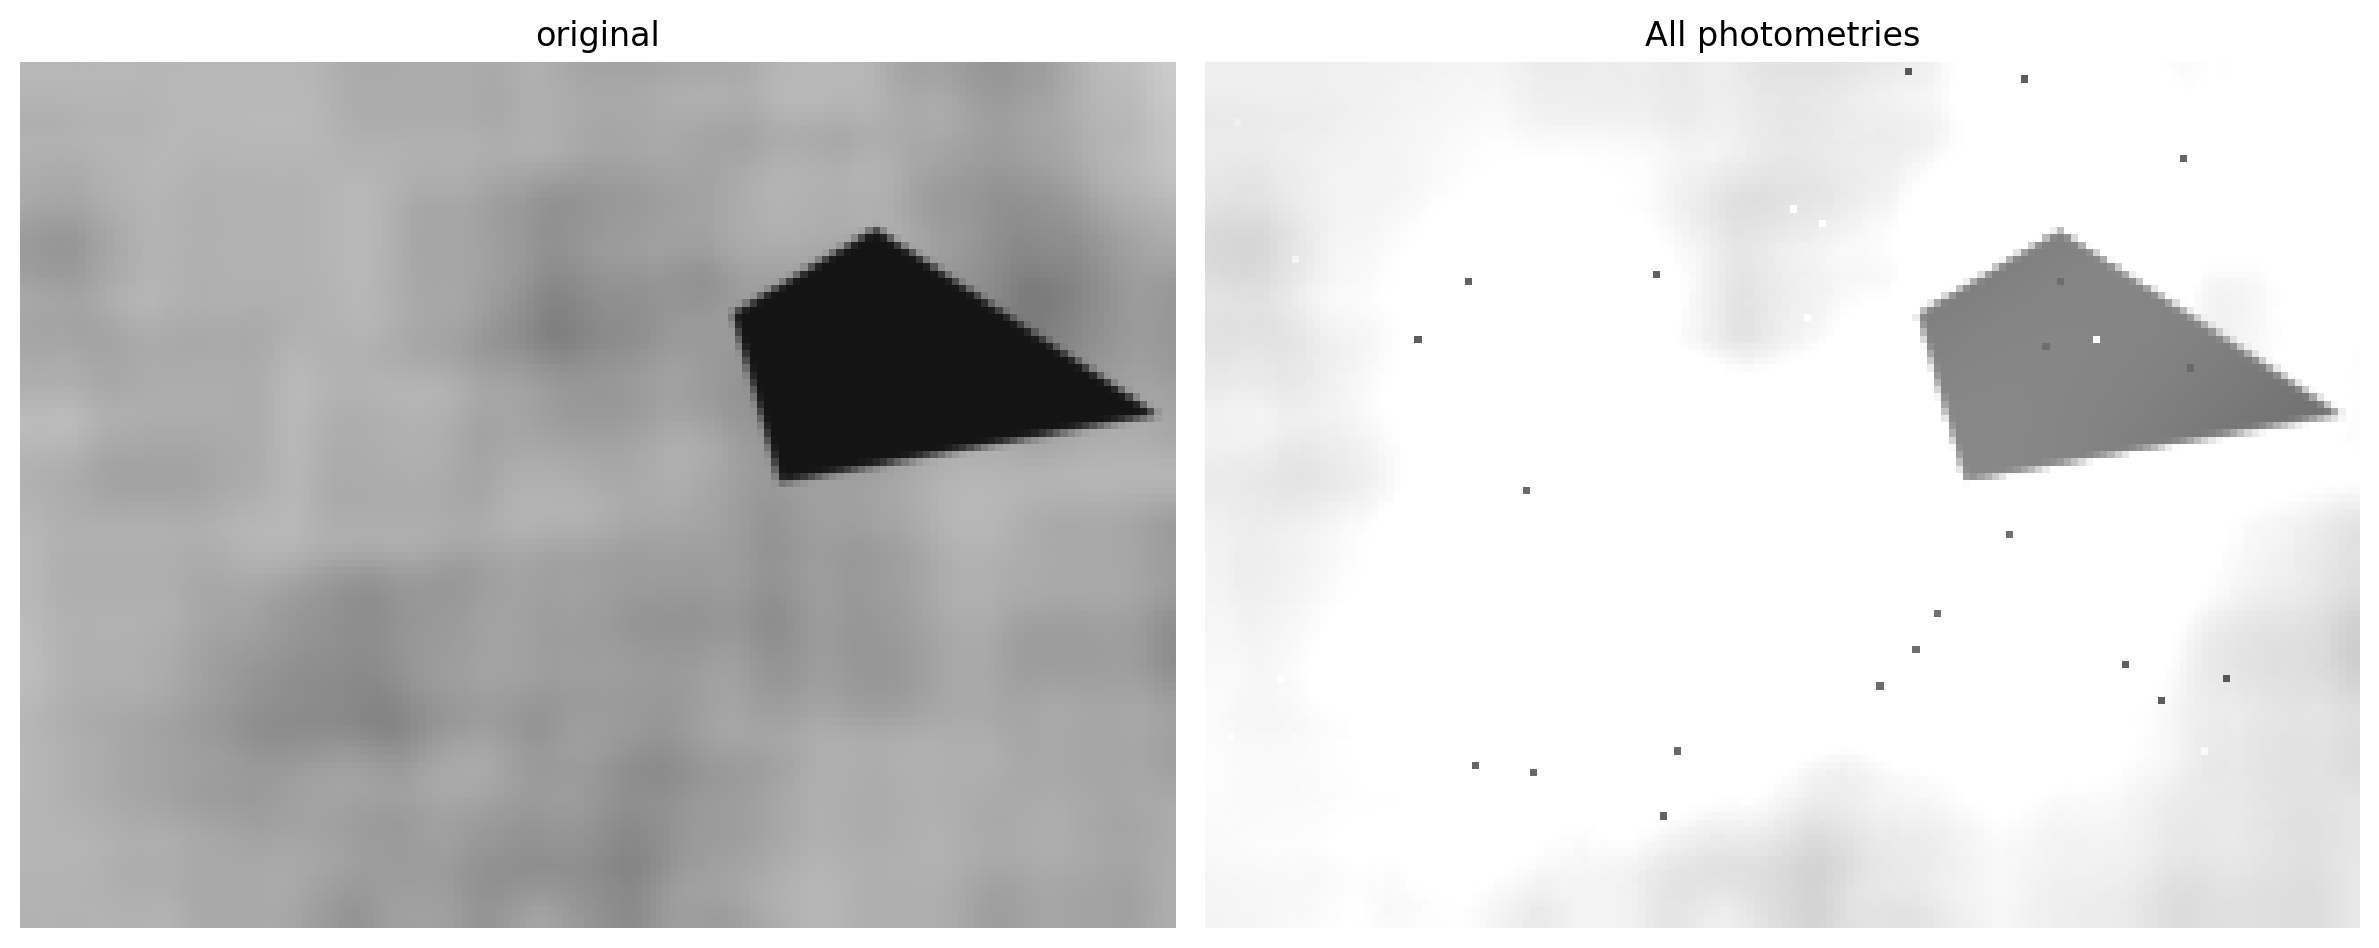

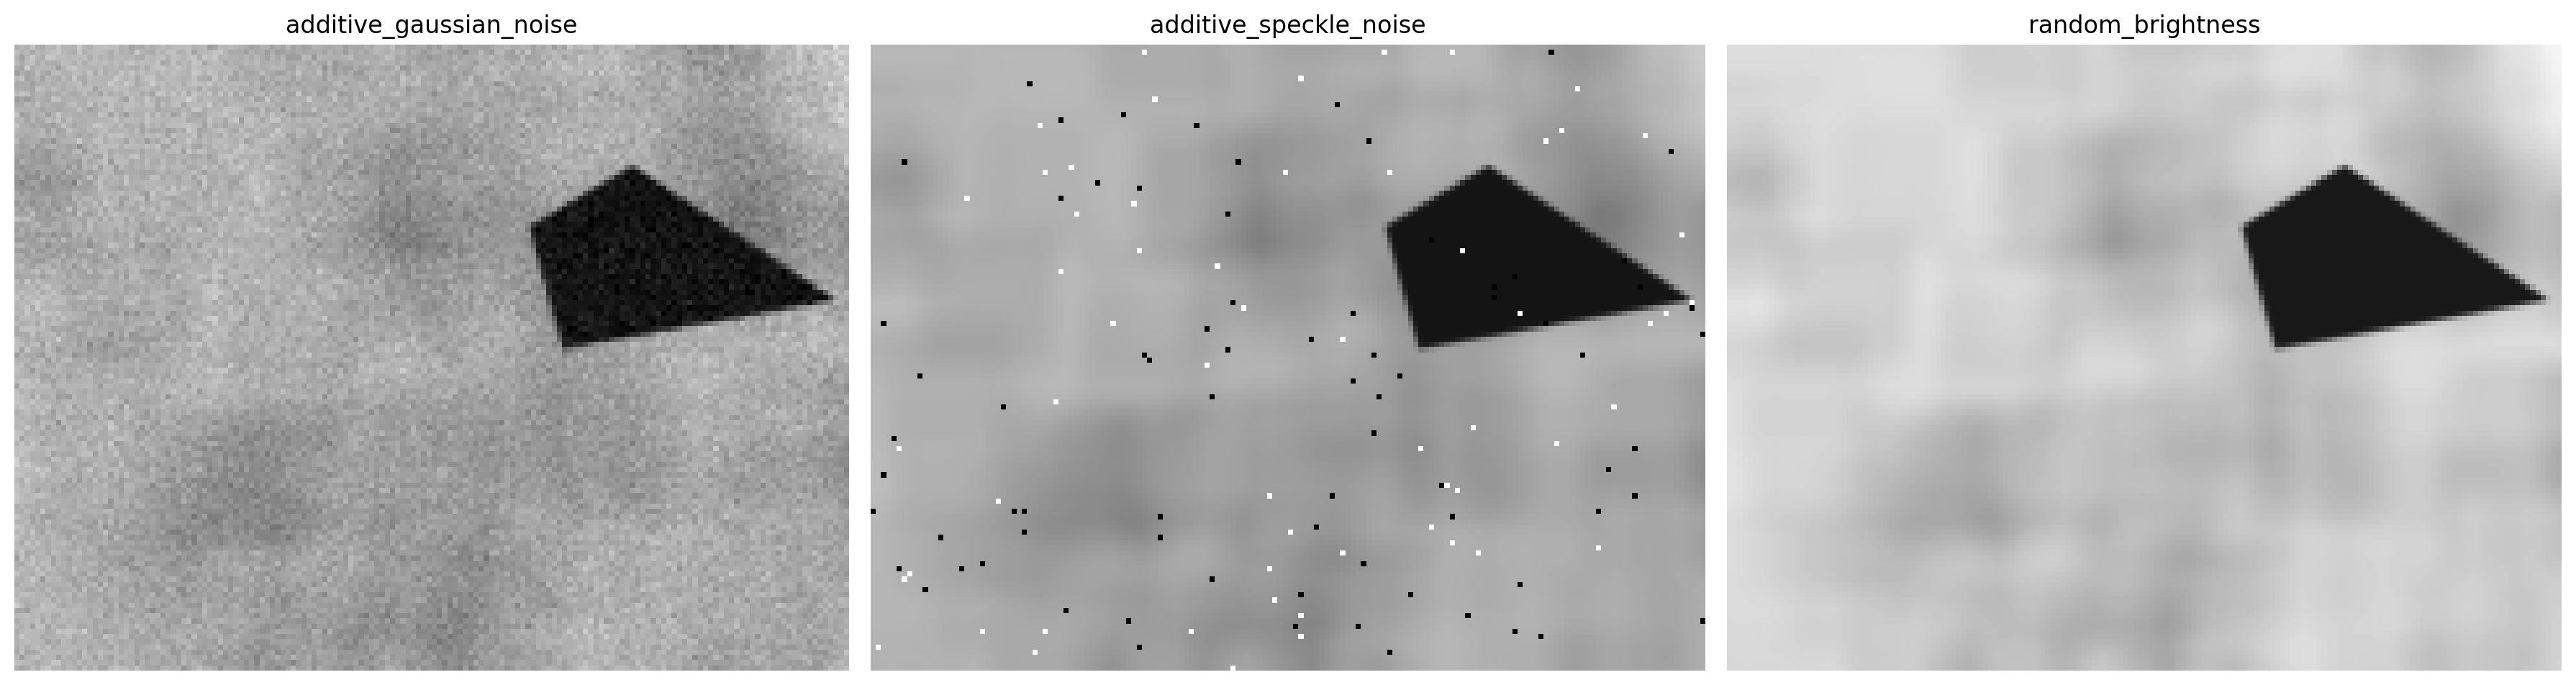

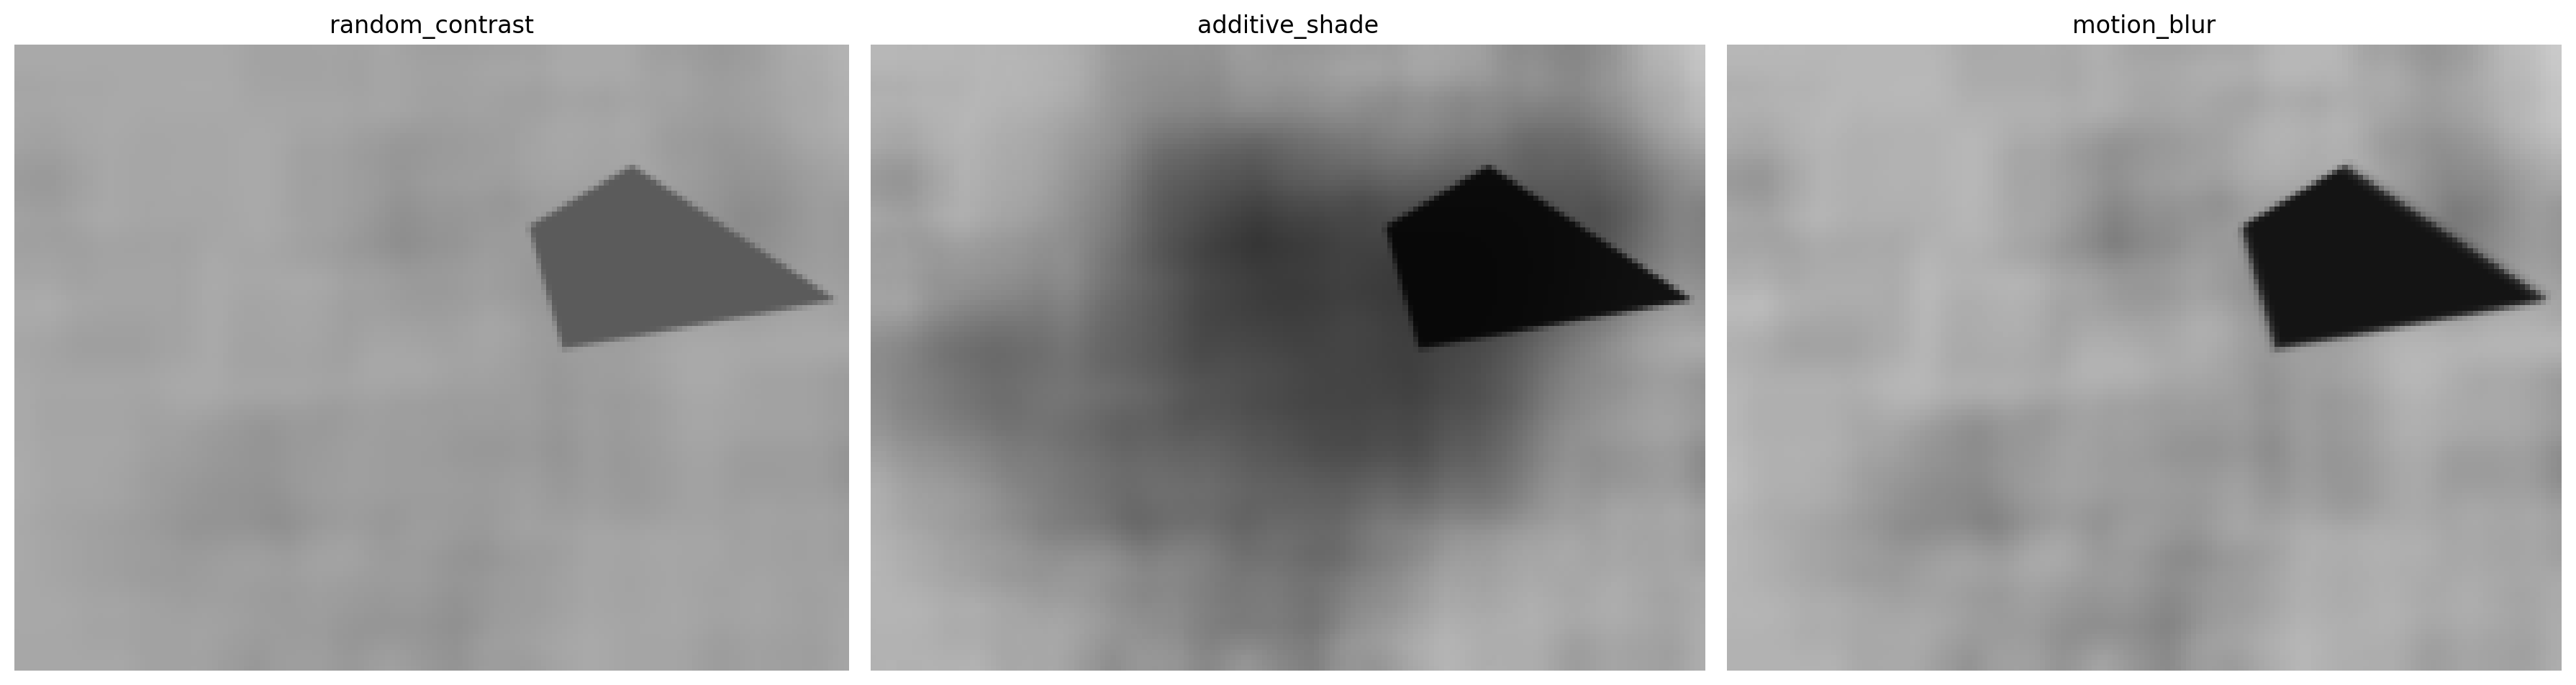

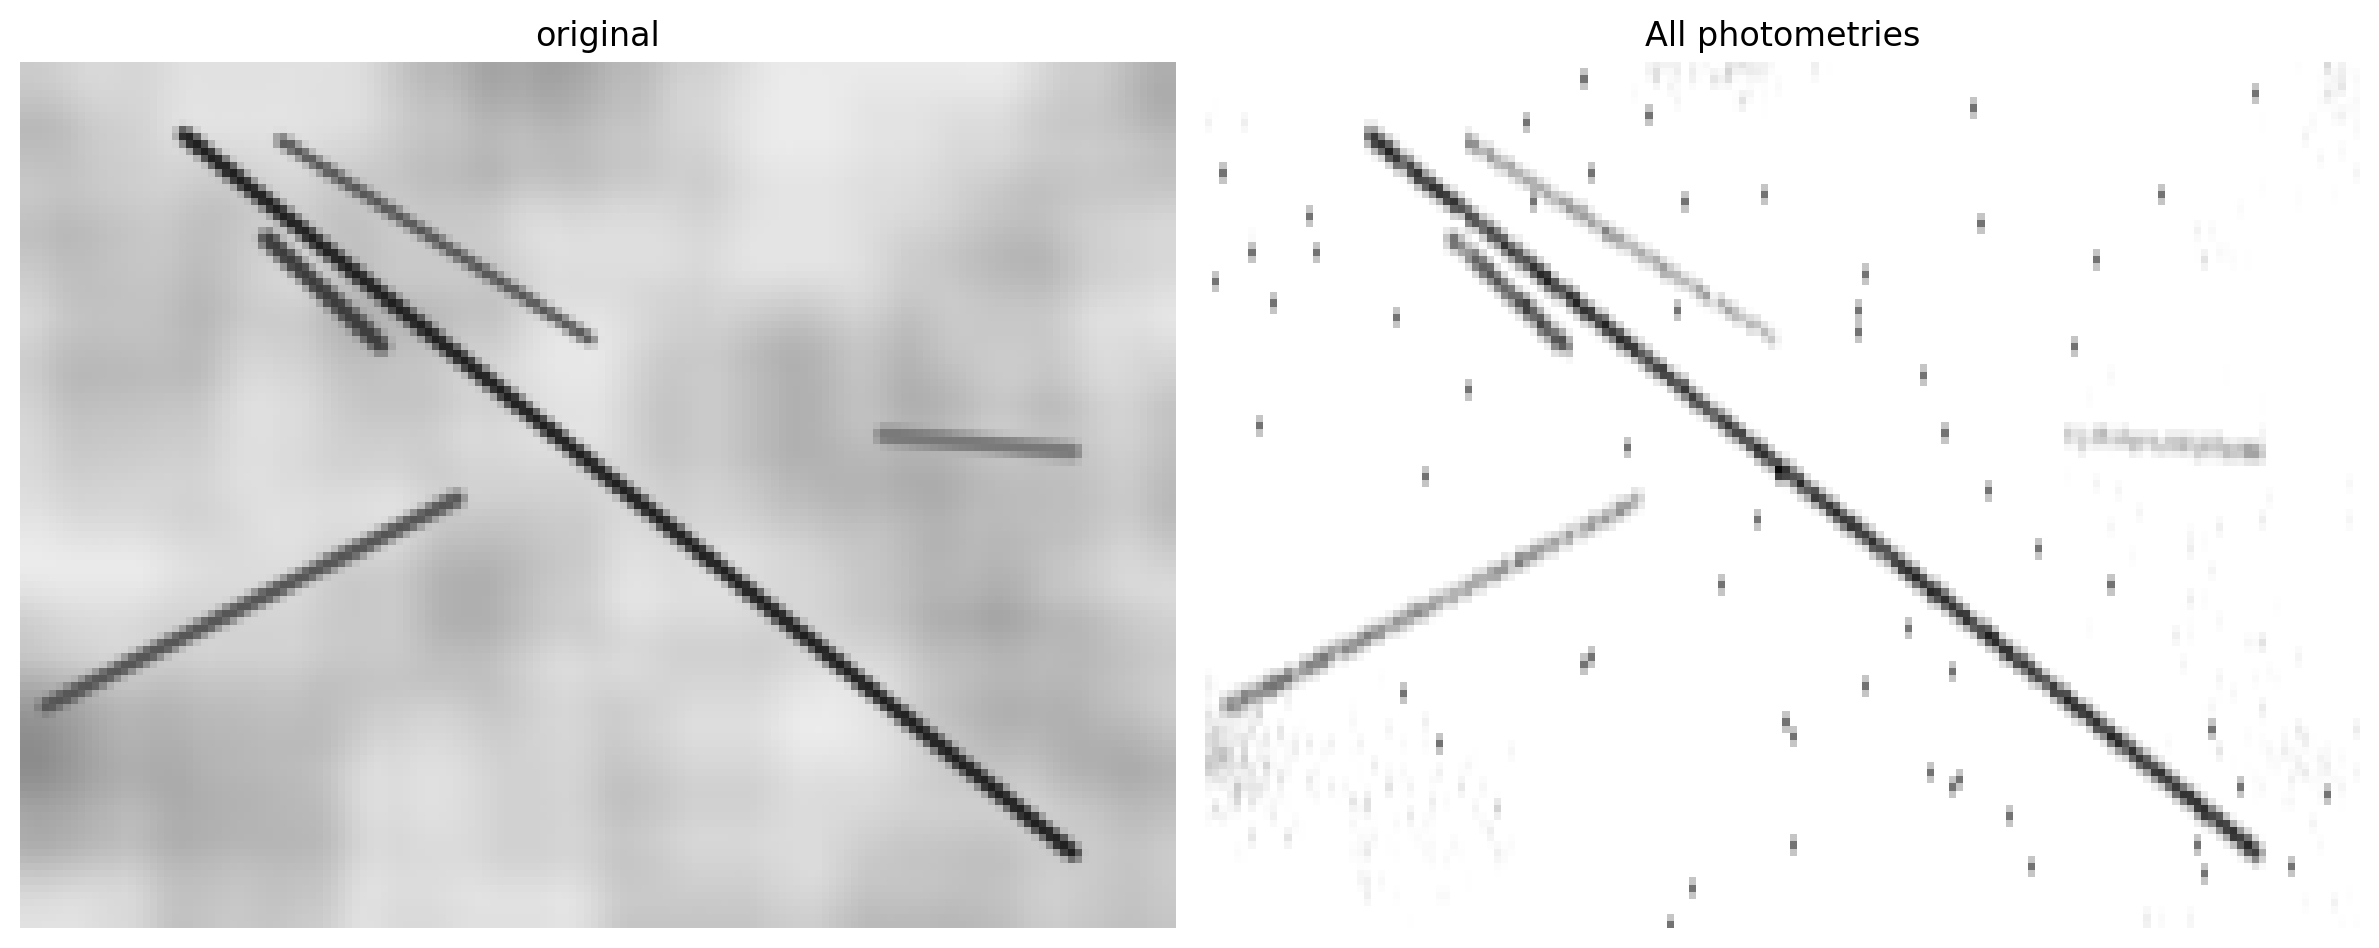

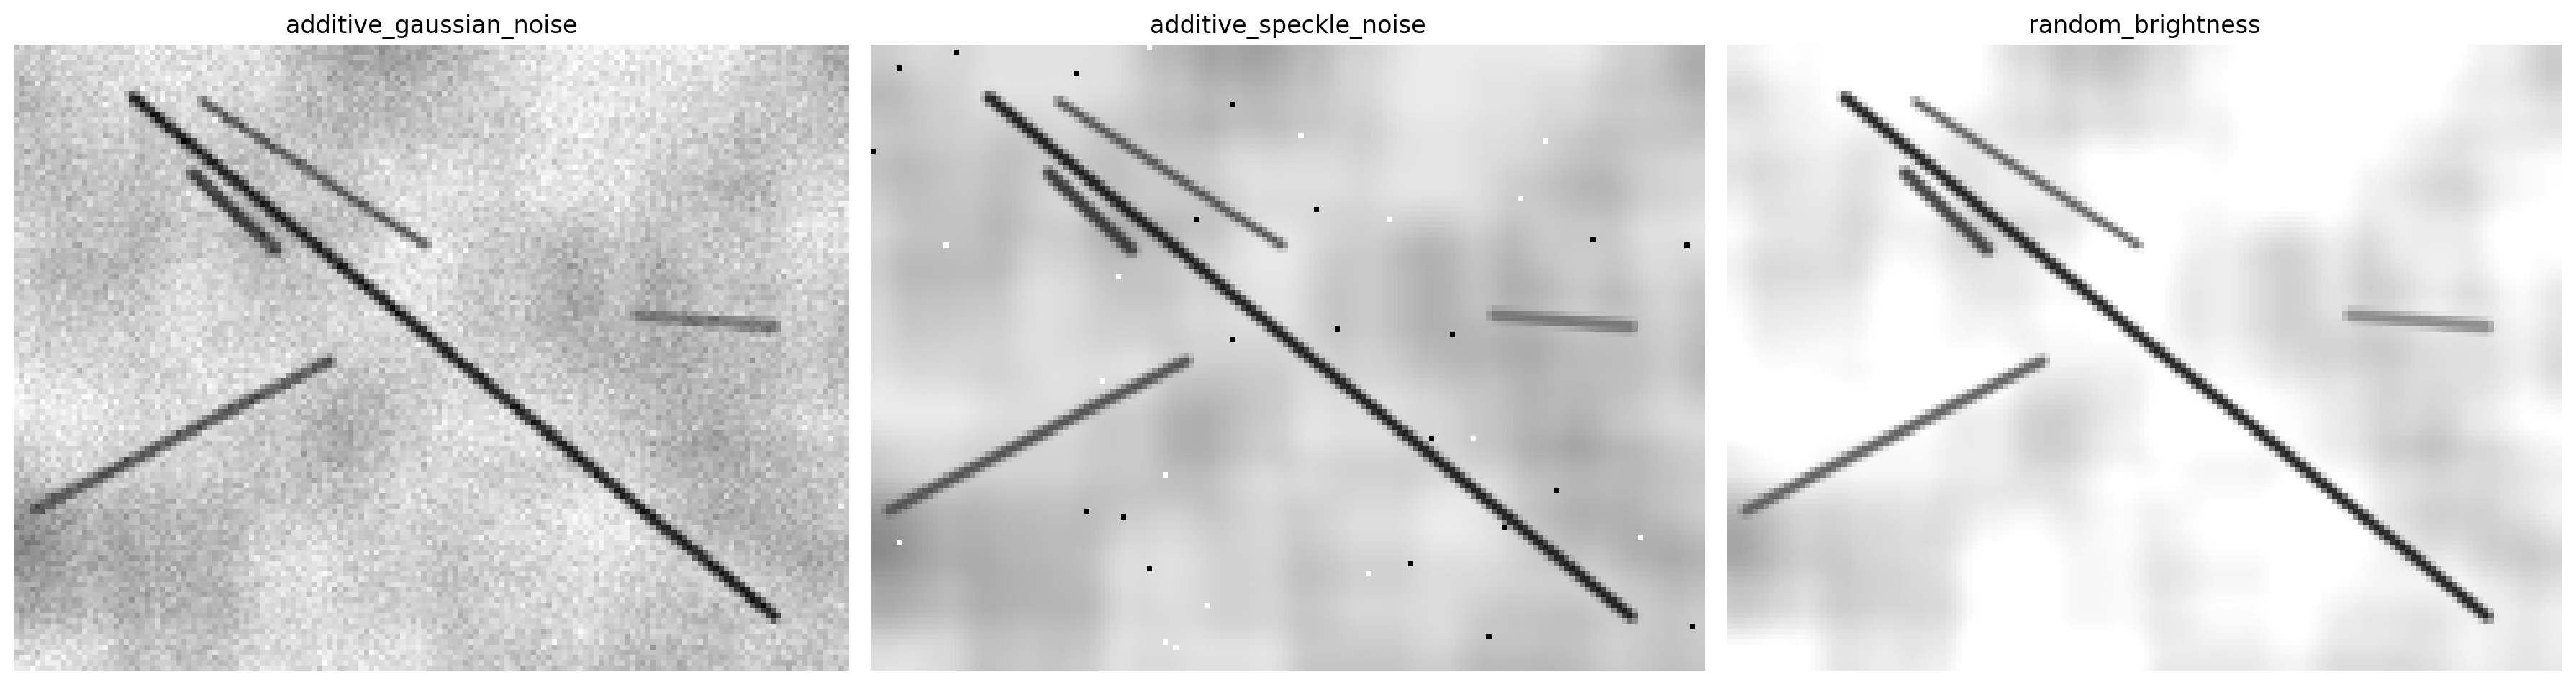

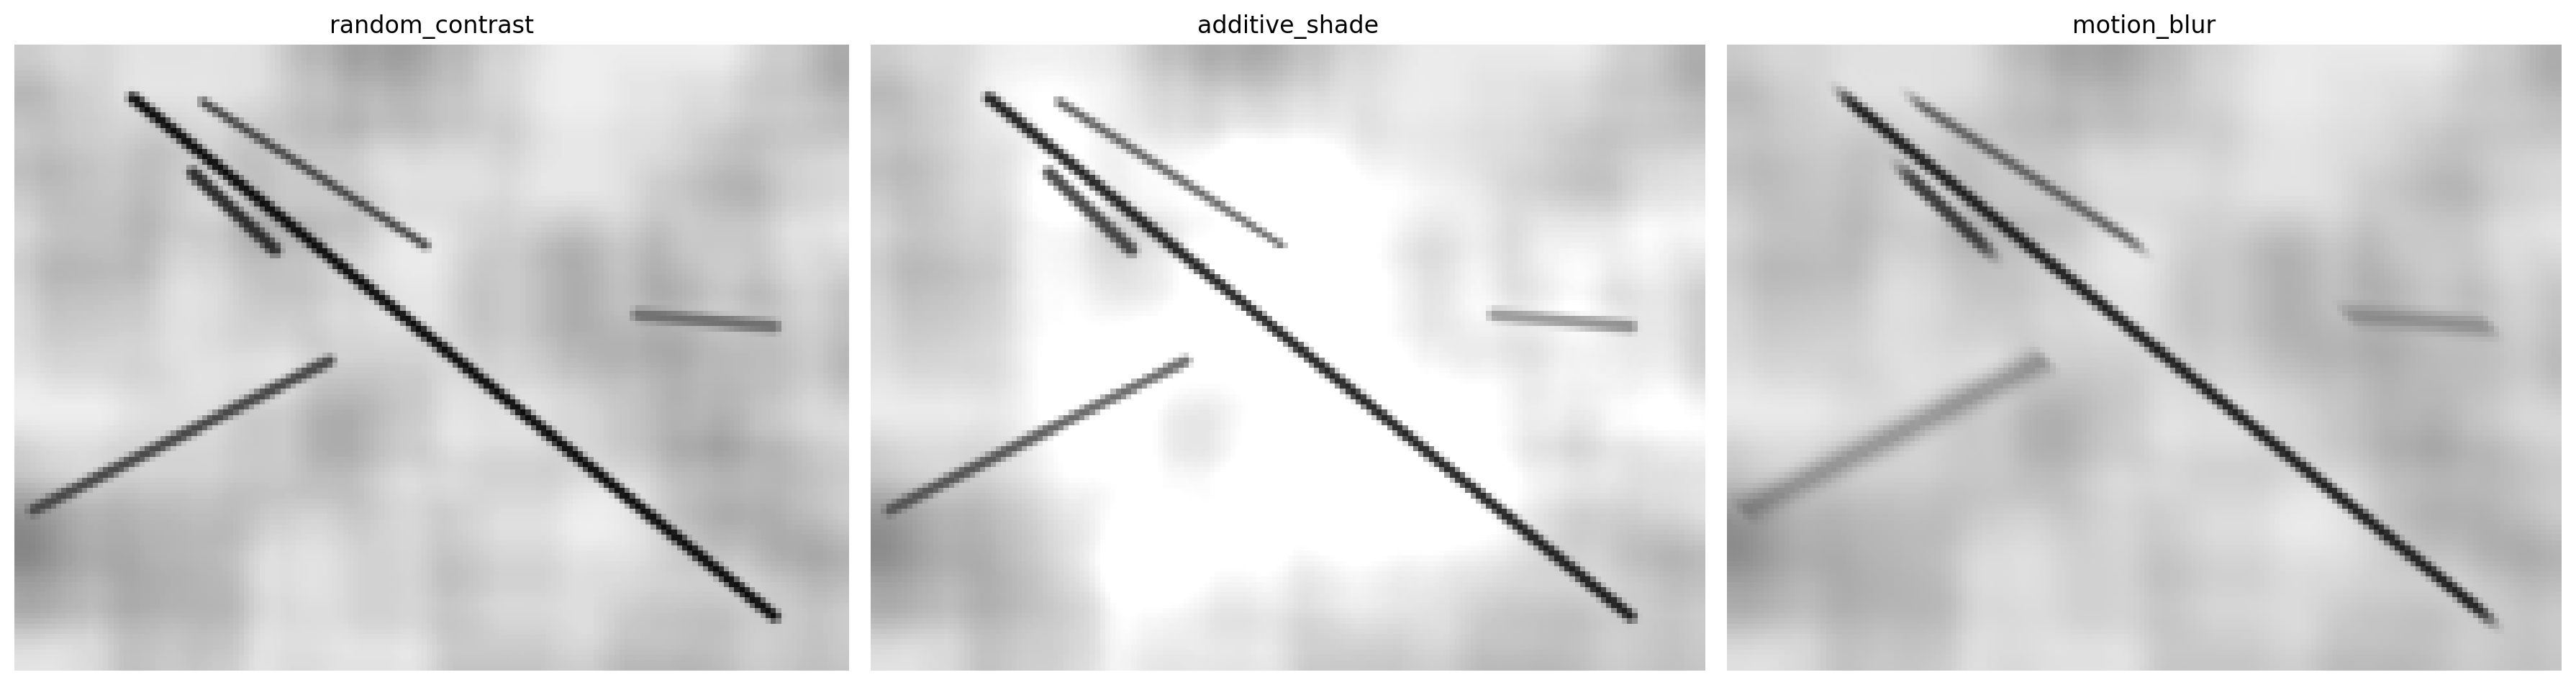

In [241]:
# Photometric augmentation visualization

rows = 3

for _ in range(rows):
    image = train_dataset.__getitem__(np.random.randint(0, train_dataset.__len__()))[0]
    image_channel = image[0] * 255
    
    all_photometries = photometric_augmentation(image_channel, data_config)
    all_photometries /= 255.
    all_photometries = np.stack((all_photometries,) * 3, axis=0)
    
    frames = [image.transpose((1, 2, 0)), all_photometries.transpose((1, 2, 0))]
    
    plot_images(frames, titles=['original', 'All photometries'], dpi=200)
    
    frames = []
    
    primitives = parse_primitives(data_config['primitives'], photometries.augmentations)
    prim_configs = [data_config['augmentation']['photometric']['params'].get(p, {}) for p in primitives]
    
    for p, c in zip(primitives, prim_configs):
        photometried = getattr(photometries, p)(image_channel, c).astype(np.float)
        
        photometried /= 255.
        photometried = np.stack((photometried,) * 3, axis=0)
        
        frames.append(photometried.transpose((1, 2, 0)))
        
    plot_images(frames[:3], titles=primitives[:3], dpi=200)
    plot_images(frames[3:], titles=primitives[3:], dpi=200)

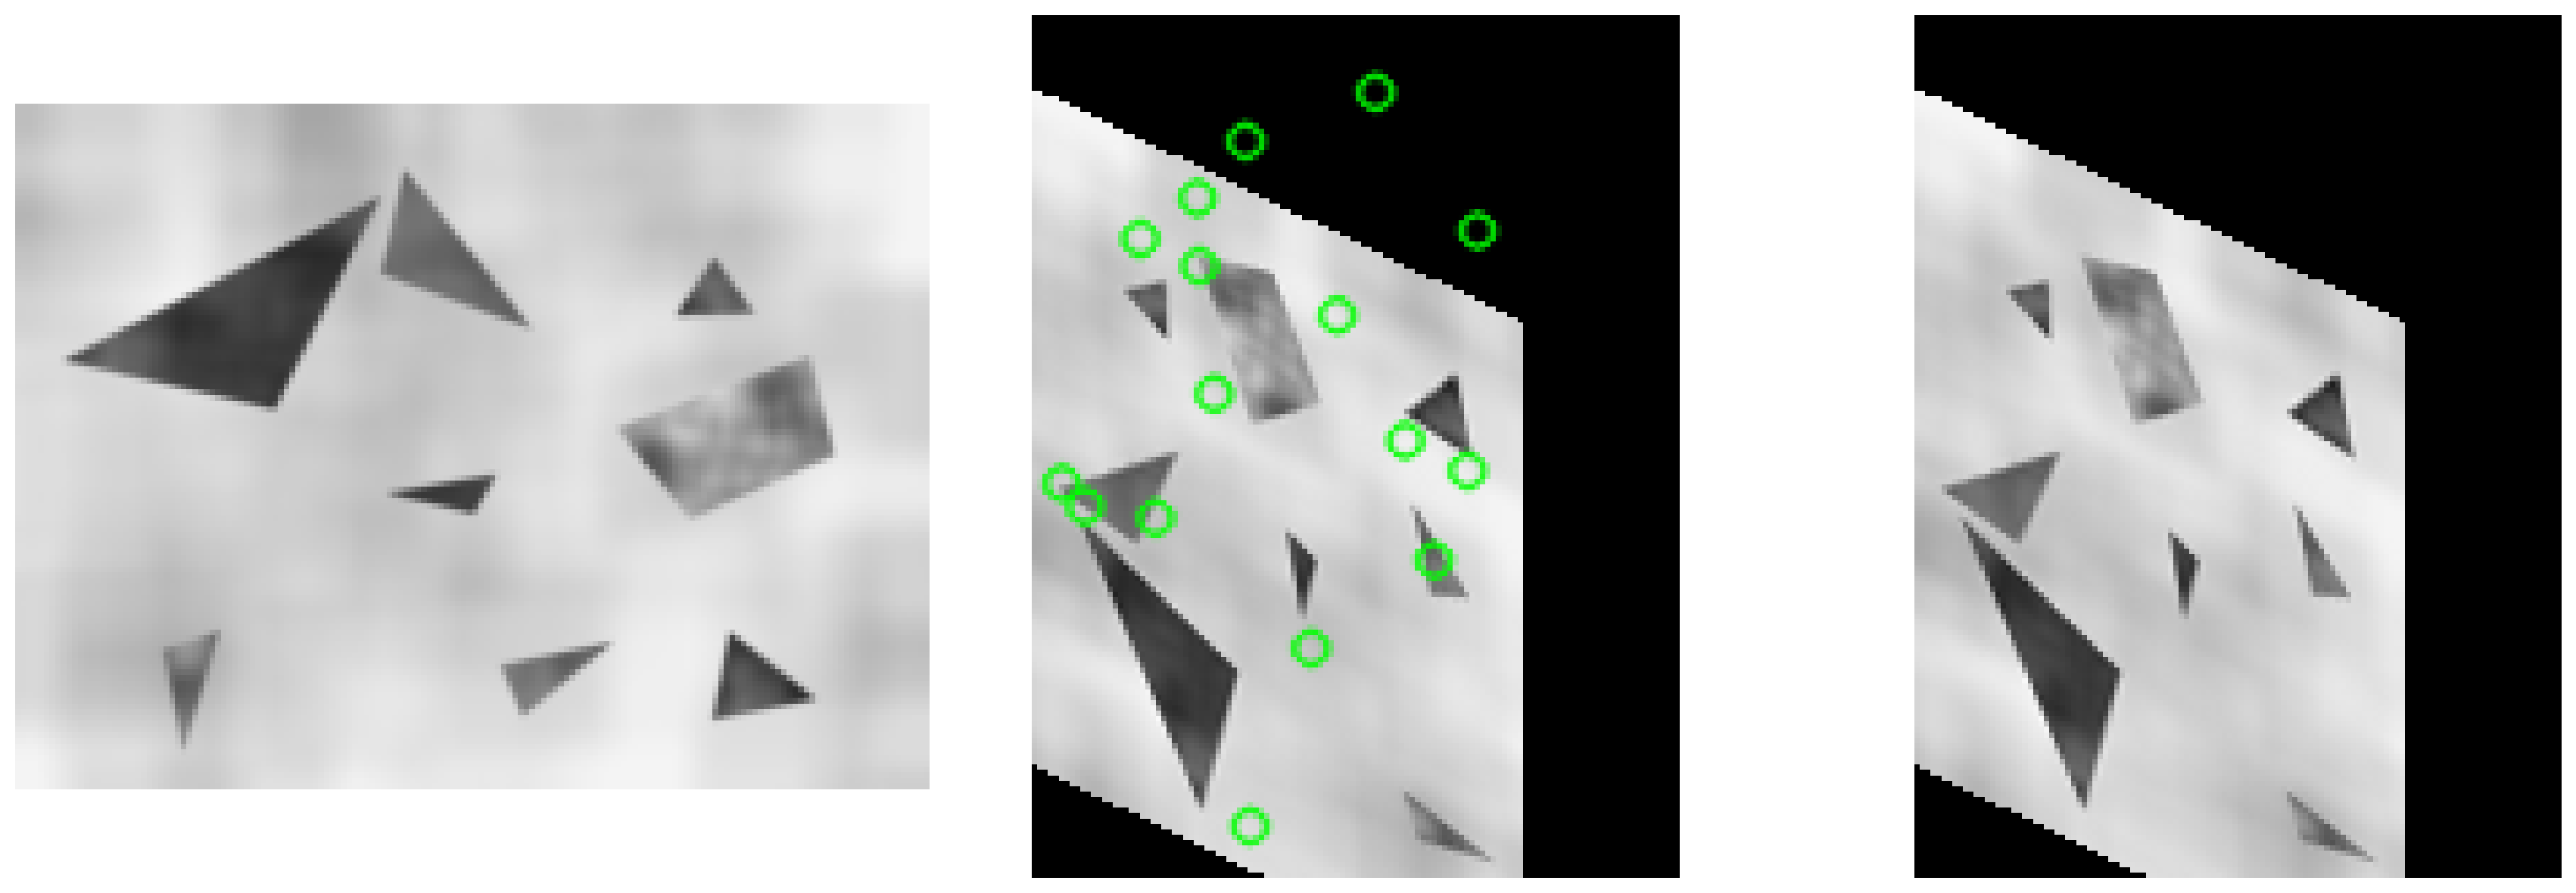

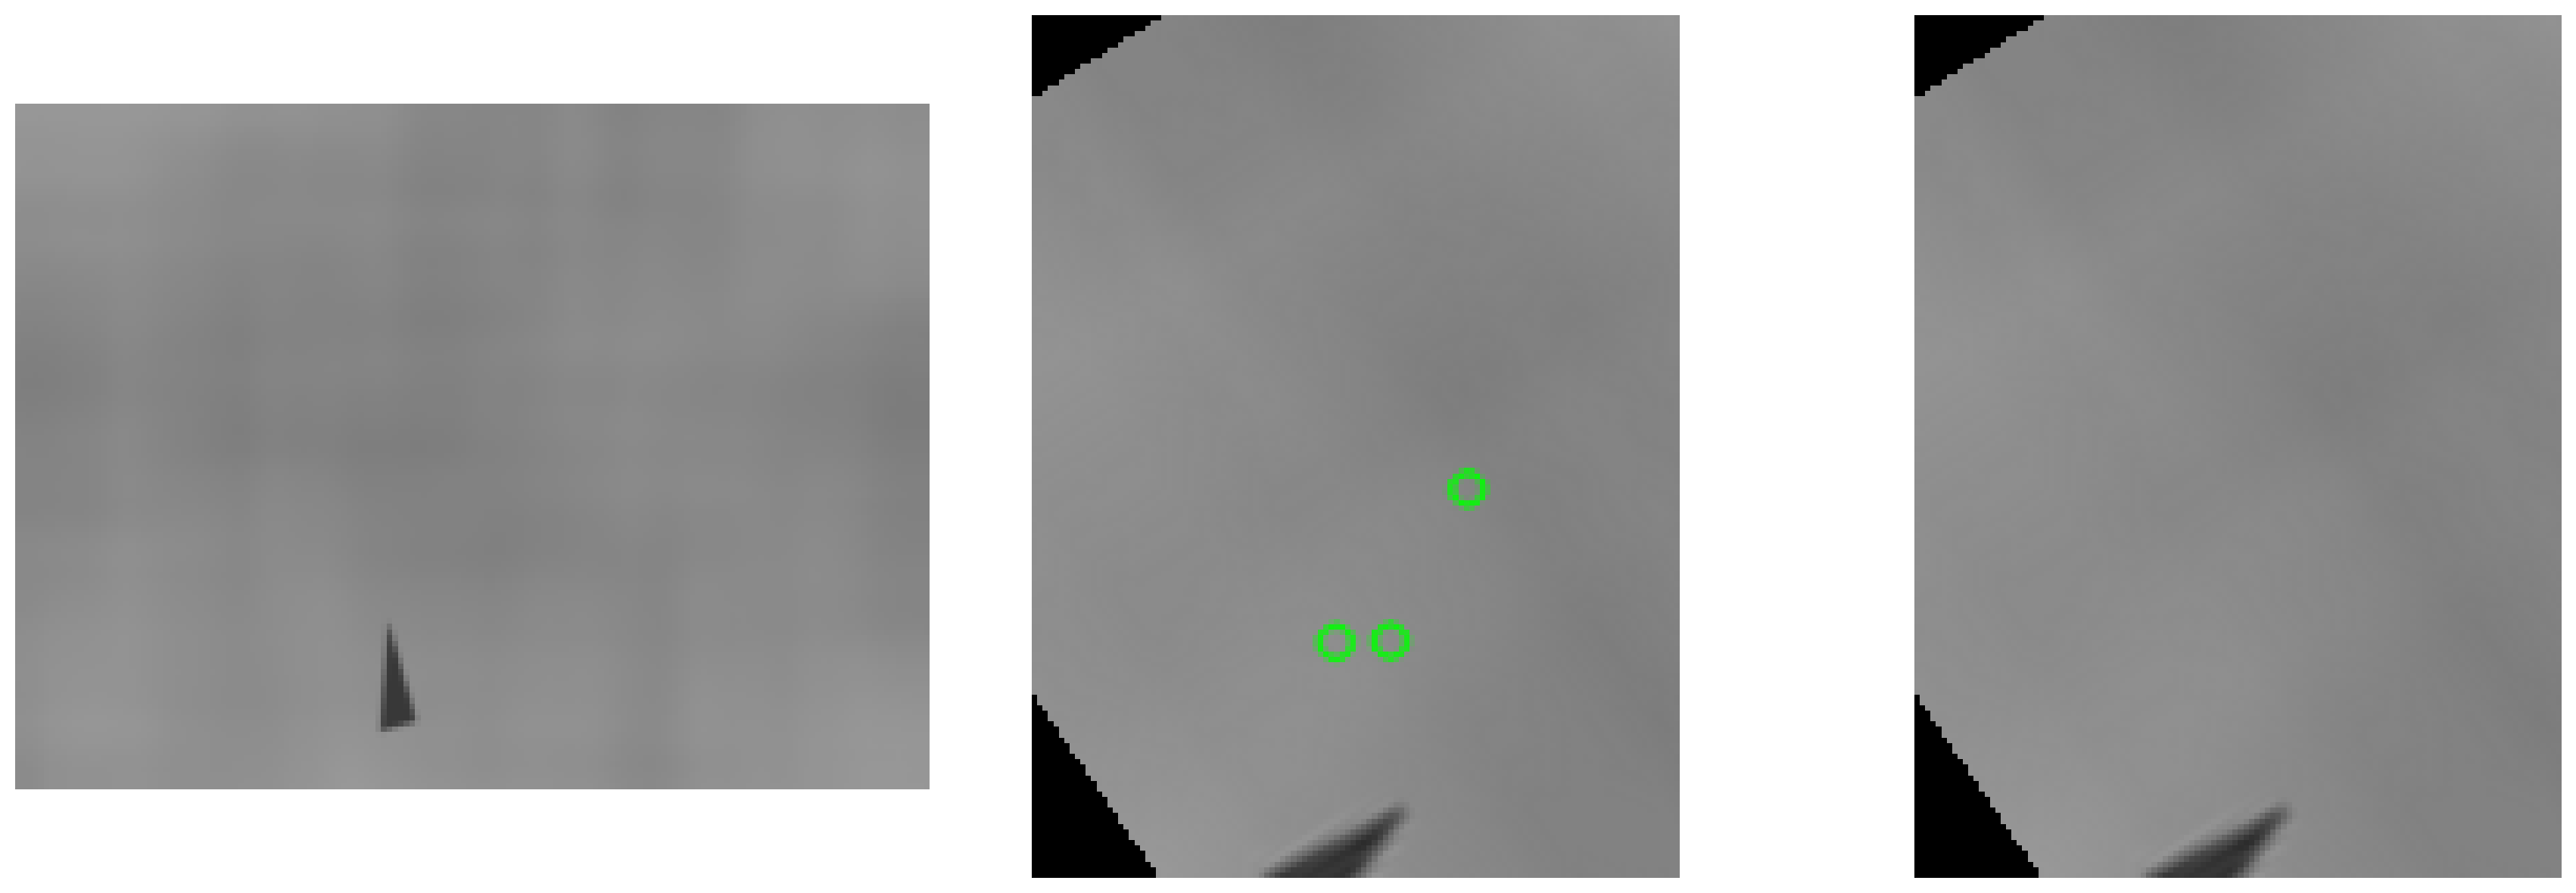

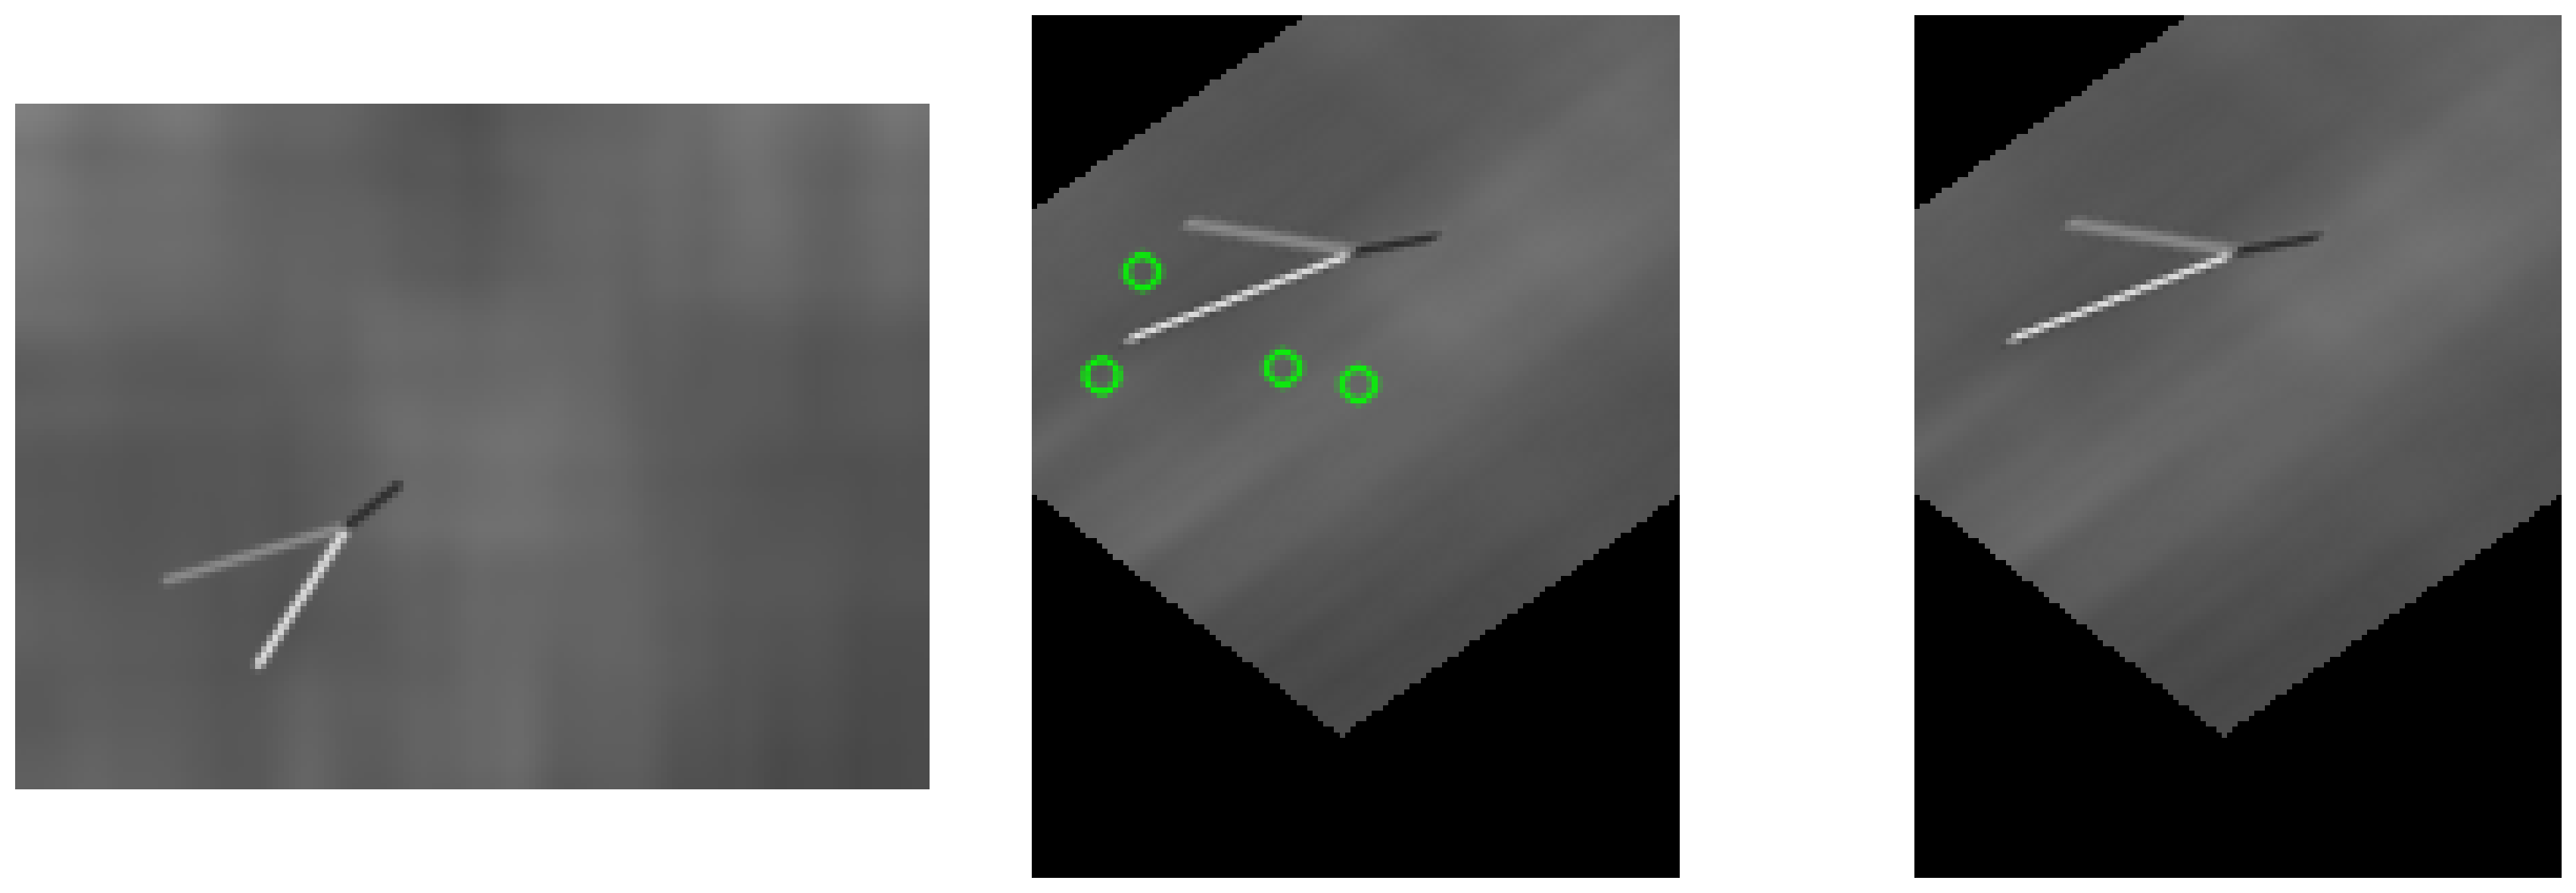

In [265]:

for _ in range(rows):
    data = train_dataset.__getitem__(np.random.randint(0, train_dataset.__len__()))
    image = data[0]
    image_channel = image[0] * 255
    
    frames = [image.transpose((1, 2, 0))]
    
    warped_image, warped_points = homographic_augmentation(image_channel, data[1], data_config['augmentation']['homographic'])
    
    frame_warped_points = [cv2.KeyPoint(c[1], c[0], 1) for c in warped_points]
    frames.append(cv2.drawKeypoints(warped_image.astype(np.uint8), frame_warped_points, None, color=(0, 255, 0)))
    
    warped_image /= 255.
    warped_image = np.stack((warped_image,) * 3, axis=0)
    
    frames.append(warped_image.transpose((1, 2, 0)))
    
    plot_images(frames, dpi=200)
